 **Pronosticar IGAE** 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

## La parte de series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

In [3]:
igae = pd.read_csv('IGAE.csv', index_col='Fecha', parse_dates=True)

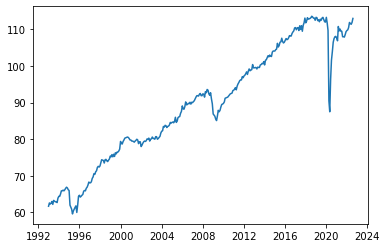

In [9]:
plt.plot(igae);

In [12]:
# Prueba de Dickey-Fuller
adf = adfuller(igae)

# Nivel de signficancia 0.05
alpha = 0.05
if adf[1] > alpha: 
    print('Se rechaza Ho, la serie es estacionaria')
else:
    print('No se rechaza Ho, la serie es no estacionaria')

Se rechaza Ho, la serie es estacionaria


In [14]:
igae_diff = igae.diff()

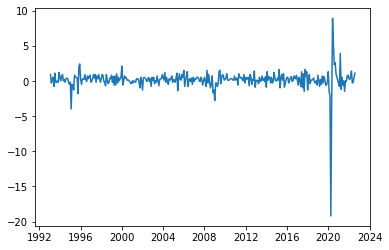

In [17]:
plt.plot(igae_diff);

In [27]:
# Prueba de Dickey-Fuller
adf1 = adfuller(igae_diff.dropna())

# Nivel de signficancia 0.05
alpha = 0.05
if adf1[1] > alpha: 
    print('Se rechaza Ho, la serie es estacionaria')
else:
    print('No se rechaza Ho, la serie es no estacionaria')

No se rechaza Ho, la serie es no estacionaria


In [25]:
igae_diff = igae_diff.dropna()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


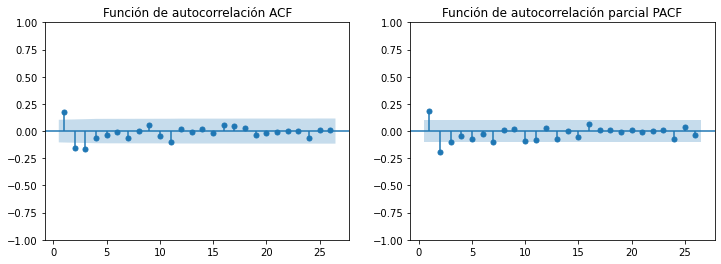

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (12,4))
## subgráfica 0
plot_acf(igae_diff, zero = False, ax = ax[0], title = 'Función de autocorrelación ACF')
ax[0].set_ylim(-1,1)
## subgráfica 1
plot_pacf(igae_diff, zero = False, ax = ax[1], title = 'Función de autocorrelación parcial PACF')
ax[1].set_ylim(-1,1)
plt.show();

In [31]:
# Estimar un AR(3)
modelo = ARIMA(igae_diff, order=(3,0,0))
resultado = modelo.fit()
resultado.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  355
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -604.048
Date:                Wed, 26 Oct 2022   AIC                           1218.097
Time:                        16:41:25   BIC                           1237.458
Sample:                    02-01-1993   HQIC                          1225.799
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1443      0.109      1.326      0.185      -0.069       0.358
ar.L1          0.1948      0.089      2.188      0.029       0.020       0.369
ar.L2         -0.1686      0.026     -6.454      0.000      -0.220      -0.117
ar.L3         -0.1006      0.046     -2.210      0.027      -0.190      -0.011
sigma2         1.7591      0.041     43.095      0.000       1.679       1.839
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            218338.01
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               7.56   Skew:                            -8.17
Prob(H) (two-sided):                  0.00   Kurtosis:                       123.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
# Estimar un MA(3)
modelo = ARIMA(igae_diff, order=(0,0,3))
resultado = modelo.fit()
resultado.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  355
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -603.232
Date:                Wed, 26 Oct 2022   AIC                           1216.463
Time:                        16:43:26   BIC                           1235.824
Sample:                    02-01-1993   HQIC                          1224.165
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1437      0.096      1.489      0.136      -0.045       0.333
ma.L1          0.1754      0.077      2.288      0.022       0.025       0.326
ma.L2         -0.1818      0.021     -8.525      0.000      -0.224      -0.140
ma.L3         -0.1756      0.078     -2.252      0.024      -0.328      -0.023
sigma2         1.7509      0.035     49.468      0.000       1.682       1.820
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            235209.56
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               7.24   Skew:                            -8.55
Prob(H) (two-sided):                  0.00   Kurtosis:                       127.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
# Estimar un ARMA(3,3)
modelo = ARIMA(igae_diff, order=(3,0,3))
resultado = modelo.fit()
resultado.summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   IGAE   No. Observations:                  355
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -600.660
Date:                Wed, 26 Oct 2022   AIC                           1217.319
Time:                        16:45:00   BIC                           1248.296
Sample:                    02-01-1993   HQIC                          1229.643
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1416      0.073      1.944      0.052      -0.001       0.284
ar.L1         -0.1737      0.261     -0.666      0.506      -0.685       0.338
ar.L2          0.6003      0.212      2.837      0.005       0.186       1.015
ar.L3         -0.0306      0.272     -0.112      0.911      -0.564       0.503
ma.L1          0.3528      0.262      1.345      0.179      -0.161       0.867
ma.L2         -0.7326      0.183     -4.013      0.000      -1.090      -0.375
ma.L3         -0.2756      0.208     -1.323      0.186      -0.684       0.133
sigma2         1.7251      0.043     39.968      0.000       1.641       1.810
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            260746.45
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.14   Skew:                            -8.93
Prob(H) (two-sided):                  0.00   Kurtosis:                       134.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# Utilizando un criterio AIC el modelo se escoge por el que tenga menor valor AIC